<a href="https://colab.research.google.com/github/hirokiyamauch/NLP_100knock/blob/%E7%AC%AC4%E7%AB%A0/100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF30_39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://nlp100.github.io/data/neko.txt

--2021-12-27 12:28:38--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.06s   

2021-12-27 12:28:38 (16.7 MB/s) - ‘neko.txt’ saved [975789/975789]



In [ ]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl libio-string

再起動

In [ ]:
!mecab -o neko.txt.mecab neko.txt

30

In [ ]:
!head -n 100 '/content/neko.txt.mecab'

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント
見当	名詞,サ変接続,*,*,*,*,見当,ケントウ,ケントー
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
つか	動詞,自立,*,*,五段・カ行イ音便,未然形,つく,ツカ,ツカ
ぬ	助動詞,*,*,*,特殊・ヌ,基本形,ぬ,ヌ,ヌ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
何	名詞,代名詞,一般,*,*,*,何,ナニ,ナニ
でも	助詞,副助詞,*,*,*,*,でも,デモ,デモ
薄暗い	形容詞,自立,*,*,形容詞・アウオ段,基本形,薄暗い,ウスグライ,ウスグライ
じめじめ	副詞,一般,*,*,*,*,じめじめ,ジメジメ,ジメジメ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
所	名詞,非自

In [ ]:
def read_mecab(fname):
 sentence_dic = []
 word_analysis = []
 with open(fname) as f:
    for line in f:
        #EOS以外の場合
        if line != 'EOS\n':
          #改行のみの場合スキップ
          if line != '\n':
            #空白で区切る
            phrase = line.split('\t')
            #,で区切る
            if phrase[0] != '':
              subphrase = phrase[1].split(',')
              #単語のマッピング型
              word_map = {'surface':phrase[0], 'base':subphrase[6], 'pos':subphrase[0], 'pos1':subphrase[1]}
              word_analysis.append(word_map)
        #EOS文末の場合
        else :
           #リストがない場合スキップ
           if word_analysis != []:
             #全体のマッピングに付け加える
             sentence_dic.append(word_analysis)
             #一文の結果を白紙
             word_analysis = []

 return sentence_dic

sentence_dic = []
sentence_dic = read_mecab('/content/neko.txt.mecab')



In [ ]:
sentence_dic[2]

[{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
 {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]

31

In [ ]:
def verd_surface(sentence_dic):
  verd=[]
  for word in sentence_dic:
    for phrase in word:
        if phrase['pos'] == '動詞':
            verd.append(phrase['surface'])

  return set(verd)

surface = []
surface = verd_surface(sentence_dic)
print(surface)

{'やめ', '傾ける', '切り付ける', 'うけ', '刈っ', '飛び出す', '与えん', 'ふう', '立ちすくん', '迎え', '奉る', '輝い', '凝らす', '引っ張っ', '従っ', '括っ', '進める', '入っ', '見える', '考え出し', '透し', '飲ま', 'あがる', 'あらわす', '動く', '取り払う', '流れれ', '承る', '終り', '対し', '近づい', '知っ', '埋め', '変ら', 'きき', '浸っ', 'わく', '御する', '凹まし', '衝く', '覆う', '誤', '決し', '上り', 'あか', '驚かす', 'でき', '平らげ', 'いら', '丸め', '埋っ', 'はちきれん', '暮れれ', '待っ', '揺れ', '燃える', '逃げ出す', 'なくなる', 'いじっ', '省け', '書き散らし', '磨き', '明い', '急き込ん', '出掛ける', '言い兼ね', '追払わ', '伏し', '明け放し', '刻ん', '真似る', '語ら', 'こ', '突こ', '落ちつか', 'つづき', '舞い', 'ならべる', '繰り返す', '書く', 'ほり', '嗅ぎ', '悟っ', '捲い', '期し', '冒し', '見識張っ', '見廻す', '変っ', '変じ', '癒せる', '噛め', 'ぱくつく', 'おっしゃい', 'こしらえ', '連れ出し', '誘わ', '相成り', '逝い', '送', 'くらべ', 'あらし', '落ちる', '洩れ', '臨ん', '見廻し', '出す', '吹き込む', '懸っ', '生え', 'こびりつく', '見くびら', 'れよ', 'くべ', '込めん', '迷わさ', '廃せ', '苦しん', '解し', '臨む', '逃がす', '噛む', '肥り', '禿げ', 'ちまう', '持っ', 'つくっ', 'ひやかし', '騒ぎ出す', '貫く', '歴', '改まる', '抛り', '奪い', '浚い', '痛ん', '聞き返し', 'はみ出し', '告げん', '散らし', '引掻い', '起き直っ', '肥っ', '証拠立て', '植え付け', '降りる', '阿', '聴い', '覚える', '

32

In [ ]:
def verd_base(sentence_dic):
  verd=[]
  for word in sentence_dic:
    for phrase in word:
        if phrase['pos'] == '動詞':
            verd.append(phrase['base'])

  return set(verd)

base = []
base = verd_base(sentence_dic)
print(base)

{'謹む', '傾ける', '切り付ける', '代える', '息む', '飛び出す', 'うめる', 'ふう', '抓む', '奉る', '凝らす', '涼む', '進める', '見える', '躍り出る', 'あらわす', 'あがる', '取り払う', '動く', '漲る', '固まる', '承る', '焼く', 'とろける', '追付く', '浮かぶ', '瘠せる', '書きつける', '御する', '畳み込む', 'わく', '衝く', '覆う', '通じる', '植え付ける', '驚かす', '下ろす', 'じらす', '燃える', '逃げ出す', 'なくなる', '費やす', '已める', '出掛ける', '引掻く', '競う', '染め出す', '真似る', 'あったまる', 'ならべる', '繰り返す', '明け放す', '書く', 'かすむ', '減ずる', '懲らしめる', '囃す', '濁る', '見廻す', '癒せる', '持てる', 'ぱくつく', '吸う', 'えむ', '凋む', '落ちる', '招く', '出す', '吹き込む', 'よべる', 'こびりつく', '行き過ぎる', '蒸す', '敗れる', 'かさねる', '臨む', '逃がす', '噛む', '与る', 'ちまう', '坐り込む', '騒ぎ出す', '貫く', '踏み出せる', '放り出す', '改まる', 'ねむる', 'ふさぐ', 'あきれる', '降りる', '刈る', '覚える', '存じる', '責める', '窺う', '因る', '云う', '繰る', '解せる', '踞る', '連れる', '利かす', '申し聞ける', '揃う', 'こぼす', '捩じる', '極める', '罷る', '取り落す', '誓う', '詫びる', 'まかり間違う', '話せる', '思い立つ', '通り越す', '悟る', '冒す', 'のぞく', '持ち上げる', '隣る', 'なげる', '泣く', '浮ぶ', 'くらべる', 'おいたつ', '変じる', '向く', '忍ばす', '流れる', '務まる', '中る', '這う', 'しゃべる', 'られる', 'さます', '突き戻す', 'おきる', '疑る', '突き出す', '言い付ける', '恋う', 'じゃらす

33

In [ ]:
def noun_phrase(sentence_dic):
  noun_phrase=[]
  for word in sentence_dic:
    for i in range(2, len(word)):
        #名詞+「の」+名詞の並びのものを調べる
        if word[i-2]['pos'] == '名詞'and word[i-1]['surface'] == 'の' and word[i]['pos'] == '名詞':
            noun_phrase.append(word[i-2]['surface'] +word[i-1]['surface'] +word[i]['surface'])

  return noun_phrase

noun_list = []
noun_list = noun_phrase(sentence_dic)
print(noun_list)

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '斯産の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '悪口の言いよう', '人の気', '彼の背中', 'こっちの便利', '自己の力量', '人間の不徳', '吾輩の家', '家の裏', '浩然の気', '小春の穏', '日の二', '茶の木の根', '西側の杉', '垣のそば', '他の庭', '純粋の黒', '彼の皮膚', '皮膚の上',

34

In [ ]:
def noun_concatenation(sentence_dic):
  noun_con=[]
  for word in sentence_dic:
    cnt = 0
    noun_phrase = ''
    for i in range(len(word)):
        #名詞の場合
        if word[i]['pos'] == '名詞':
            cnt += 1
            noun_phrase += word[i]['surface']
        #名詞以外 cntが２以上でnoun_conにappend
        else:
            if cnt >= 2:                                 
                noun_con.append(noun_phrase)
            cnt = 0
            noun_phrase = ''           

  return noun_con

noun_con_list = []
noun_con_list = noun_concatenation(sentence_dic)
print(noun_con_list)

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛君', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎呼わり', '平生吾輩', '馬鹿野郎', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな日', '二時頃', '昼飯後', '運動かたがた', '一本一本', '杉垣', '前後不覚', '庭内', '忍び入り', '黒猫', '柔毛', '出ずるよう', '猫中', '杉垣', '二三枚', 'ぐべき力', '険呑', '時吾輩', '言葉付', '誰だい', '乱暴猫', '同盟敬遠主義', '一体車屋', '大分強そう', 'おれなんざ', '茶畠', '箆棒め', 'あらら', 'その後吾輩', '車屋相当', '不徳事件', '日例', '茶畠', '何匹', '近付', '事彼', '手柄話', '欠所', '三

35

In [ ]:
!pip install japanize-matplotlib

In [ ]:
def word_counter(sentence_dic):
  counter_dic={}
  for line in sentence_dic:
    for word in line:
        #出現しない言語は新しく保存
        if not word['surface'] in counter_dic:
            counter_dic[word['surface']] = 1
        #出現する場合はcounterを増やす
        else:
           cnt = counter_dic[word['surface']]
           cnt += 1
           counter_dic[word['surface']] = cnt

  return sorted(counter_dic.items(), reverse=True, key=lambda x : x[1])


36

In [ ]:
def plt_create(n,dic):
  import japanize_matplotlib
  import numpy as np
  import matplotlib.pyplot as plt

  x = [one_dic[0] for one_dic in dic[0:n]]
  y = [one_dic[1] for one_dic in dic[0:n]]
  plt.figure()
  plt.bar(x, y)
  plt.show()

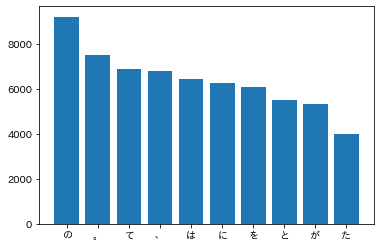

In [ ]:
word_counter_dic = {}
word_counter_dic = word_counter(sentence_dic)
plt_create(10, word_counter_dic)

37

In [ ]:
def cooccurrence_list(word_dic):
    cooccurrence_list = []
    for sentence in word_dic:
        # surfaceに猫が含まれていたらlistに追加する。
        word_list = [word['surface'] for word in sentence]
        if "猫" in word_list:
            cooccurrence_list.extend([word for word in word_list if word != "猫"])
    return cooccurrence_list

def word_cooccurrence_counter(list):
    counter_dic={}
    for word in list:
        #出現しない言語は新しく保存
        if not word in counter_dic:
            counter_dic[word] = 1
        #出現する場合はcounterを増やす
        else:
           cnt = counter_dic[word]
           cnt += 1
           counter_dic[word] = cnt

    return sorted(counter_dic.items(), reverse=True, key=lambda x : x[1])

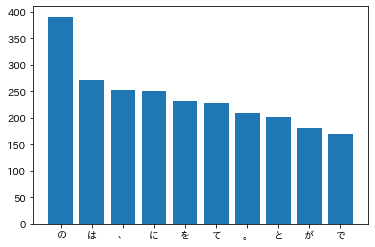

In [ ]:
cat_list = cooccurrence_list(sentence_dic)
word_counter_dic = {}
word_counter_dic = word_cooccurrence_counter(cat_list)

plt_create(10, word_counter_dic)

38

In [ ]:
def plt_create_hist(dic):
   import matplotlib.pyplot as plt

   y = [one_dic[1] for one_dic in dic]
   plt.hist(y, bins=20, range=(1,50))
   plt.show()

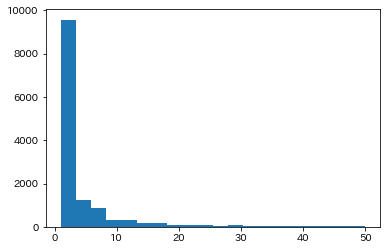

In [ ]:
word_counter_dic = {}
word_counter_dic = word_counter(sentence_dic)
plt_create_hist(word_counter_dic)

39

In [ ]:
def plt_create_zipf(dic):
  import matplotlib.pyplot as plt

  plt.xscale('log')
  plt.yscale('log')


  x = [one_dic[0] for one_dic in dic]
  y = [one_dic[1] for one_dic in dic]

  plt.xlabel('ランク')
  plt.ylabel('出現頻度')



  plt.scatter(x=range(1, len(x)+1), y=y, s=2)

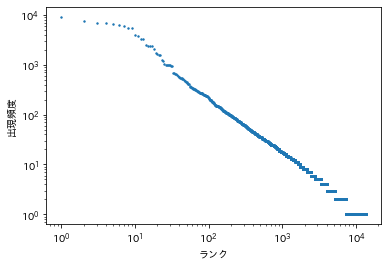

In [ ]:
word_counter_dic = {}
word_counter_dic = word_counter(sentence_dic)
plt_create_zipf(word_counter_dic)